In [172]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import math
import random

In [188]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [189]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [209]:

def lstm_univariate_loop(dataset):
    
    random.seed(1)
    dataset = df.values
    dataset = df.astype('float32')
    
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    print('Spliting into train and test')
    train_size = int(33600)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    # reshape into X=t and Y=t+1
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    testY_copy = testY.copy()
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    print('Creating and fitting the LSTM network')
    model = Sequential()
    model.add(LSTM(200, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=7,batch_size = 70, verbose=1,validation_split=0.04)
    
    # make predictions
    print('Making predictions')
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    #Metrics
    print('Calculating metrics')
    rmsle_i = rmsle(testY_copy,testPredict)
    
    return rmsle_i

In [210]:
# load the dataset
path = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_tou"
all_files = glob.glob(path + "/*.csv")

i = 0
rmsle_t = []
for filename in all_files:
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)))
    df = pd.read_csv(filename)
    df.set_index("tstp", inplace = True)
    rmsle_i = lstm_univariate_loop(df)
    rmsle_t.append(round(rmsle_i,2))

filename number 1 of 12
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/7
32252/32252 [==============================] - 3s 88us/step - loss: 0.0031 - val_loss: 0.0051
Epoch 2/7
32252/32252 [==============================] - 2s 72us/step - loss: 0.0027 - val_loss: 0.0051
Epoch 3/7
32252/32252 [==============================] - 2s 72us/step - loss: 0.0027 - val_loss: 0.0051
Epoch 4/7
32252/32252 [==============================] - 2s 73us/step - loss: 0.0027 - val_loss: 0.0051
Epoch 5/7
32252/32252 [==============================] - 2s 74us/step - loss: 0.0027 - val_loss: 0.0051
Epoch 6/7
32252/32252 [==============================] - 2s 75us/step - loss: 0.0027 - val_loss: 0.0050
Epoch 7/7
32252/32252 [==============================] - 2s 73us/step - loss: 0.0027 - val_loss: 0.0050
Making predictions
Calculating metrics
filename number 2 of 12
Spliting into train and test
Creating and fitting the LSTM network
Tr

Making predictions
Calculating metrics
filename number 10 of 12
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/7
32252/32252 [==============================] - 3s 100us/step - loss: 0.0059 - val_loss: 0.0024
Epoch 2/7
32252/32252 [==============================] - 3s 85us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 3/7
32252/32252 [==============================] - 3s 85us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 4/7
32252/32252 [==============================] - 3s 82us/step - loss: 0.0043 - val_loss: 0.0022
Epoch 5/7
32252/32252 [==============================] - 3s 83us/step - loss: 0.0042 - val_loss: 0.0023
Epoch 6/7
32252/32252 [==============================] - 3s 83us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 7/7
32252/32252 [==============================] - 3s 83us/step - loss: 0.0042 - val_loss: 0.0024
Making predictions
Calculating metrics
filename number 11 of 12
Spliting into train and tes

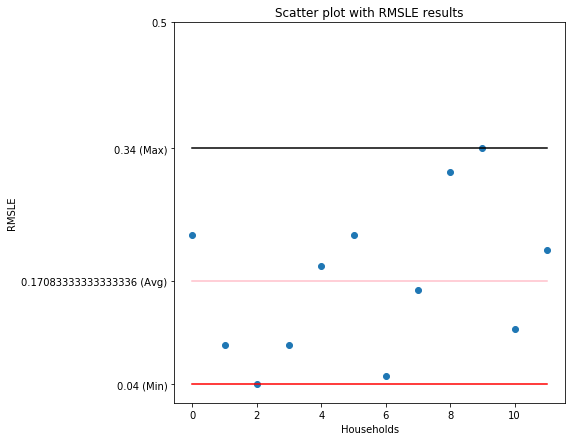

In [211]:
plt.subplot(211)
plt.figure(figsize = (7,7))
plt.scatter(range(len(rmsle_t)),rmsle_t)
plt.plot(range(len(rmsle_t)),[min(rmsle_t)]*len(rmsle_t),color = 'red')
plt.plot(range(len(rmsle_t)),[np.average(rmsle_t)]*len(rmsle_t),color = 'pink')
plt.plot(range(len(rmsle_t)),[max(rmsle_t)]*len(rmsle_t),color = 'black')
plt.yticks([min(rmsle_t),np.average(rmsle_t),max(rmsle_t),0.5],[str(min(rmsle_t))+' (Min)',str(np.average(rmsle_t)) + ' (Avg)',str(max(rmsle_t))+' (Max)','0.5'])
plt.title('Scatter plot with RMSLE results',fontsize = 12)
plt.xlabel('Households')
plt.ylabel('RMSLE')

plt.subplot(222)
plt.figure(figsize = (7,7))
plt.hist(rmsle_t)
plt.axvline(x=min(rmsle_t), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=np.average(rmsle_t), color='black', linestyle='dashed', linewidth=2)
plt.title("RMSLE results' histogram",fontsize = 12)
plt.xlabel('RMSLE')

plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/4_lstm_uni/RMSLE_adversity_tou')
plt.show()